<a id = "1" ></a>
# <span style="color:purple;"> Import Libraries </span>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


<a id = "2" ></a>
# <span style="color:purple;"> Load and Check Data </span>

In [2]:
#Load data
df_inf = pd.read_csv("C:/Users/maanu/minorproject code and dataset/archive/PCOS_infertility.csv")
df_woinf = pd.read_excel("C:/Users/maanu/minorproject code and dataset/archive/PCOS_data_without_infertility.xlsx",sheet_name="Full_new")

In [3]:
#Look at the data with infertile patients.
df_inf.head()

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26

In [4]:
#Look at the data with non-infertile patients.
df_woinf.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  

[5 rows x 45 columns]

In [5]:
#Look at the columns of data with non-infertile patients.
df_woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
    The files were divided into infertility and without-infertility patients. Let's combine them by patient file no ,delete repeated features and change PCOS(Y/N) to Target.</p>
</div>

In [6]:
#Merge the files
data = pd.merge(df_woinf,df_inf, on='Patient File No.', suffixes={'','_wo'},how='left')
#Drop repeated features
data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo',
       'II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)
#Change the title of the properties
data = data.rename(columns = {"PCOS (Y/N)":"Target"})
#Look at the merged data.
data.head() 

Sl. No  Patient File No.  Target   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1       0          28         44.6        152.0   
1       2                 2       0          36         65.0        161.5   
2       3                 3       1          33         68.8        165.0   
3       4                 4       0          37         65.0        148.0   
4       5                 5       0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                 18.0                  18.0               8.5  
1                 15.0                  14.0               3.7  
2                 18.0                  20.0              10.0  
3                 15.0                  14.0               7.5  
4                 16.0                  14.0               7.0  

[5 rows x 44 columns]

In [7]:
#Drop unnecessary features
data = data.drop(["Sl. No","Patient File No."],axis = 1)

In [8]:
data=data[data['Target'].notnull()]
data.head()

Target   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0       0          28         44.6        152.0  19.300000           15   
1       0          36         65.0        161.5  24.921163           15   
2       1          33         68.8        165.0  25.270891           11   
3       0          37         65.0        148.0  29.674945           13   
4       0          25         52.0        161.0  20.060954           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                78                22     10.48           2  ...   
1                74                20     11.70           2  ...   
2                72                18     11.80           2  ...   
3                72                20     12.00           2  ...   
4                72                18     10.00           2  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg) Follicle No. (L)  Follicle No. (R)  \
0                    80                3                 3   
1                    70                3                 5   
2                    80               13                15   
3                    70                2                 2   
4                    80                3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 42 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
    Let's look at the dtype is an object</p>
</div>

In [10]:
data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [11]:
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
    As you can see some numeric data is saved as strings : AMH(ng/mL) , II    beta-HCG(mIU/mL). Let's converting them. </p>
</div>

In [12]:
#Converting
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

<a id = "3" ></a>
# <span style="color:purple;">Variable Description</span>

 <a id = "4" ></a>
 ## <span style="color:purple;">Univariate Variable Analysis</span>
* Categorical Variable : Target,  Pregnant(Y/N), Weight gain(Y/N), hair growth(Y/N), Skin darkening (Y/N), Hair loss(Y/N), Pimples(Y/N), Fast food (Y/N), Reg.Exercise(Y/N), Blood Group
* Numerical Variable : Age (yrs), Weight (Kg),Marraige Status (Yrs)... 

<a id = "5" ></a>
## <span style="color:purple;">Categorical Variable</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<ul><p style="padding: 10px;color:white;" >Look at the value count </p>
        <li> <p style="padding: 10px;color:white;" > yes --> 1 </p> </li>
        <li > <p style="padding: 10px;color:white;" > no  --> 0 </p> </li>
</ul>
</div>

In [13]:
colors = ['#670067','#008080']

In [14]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

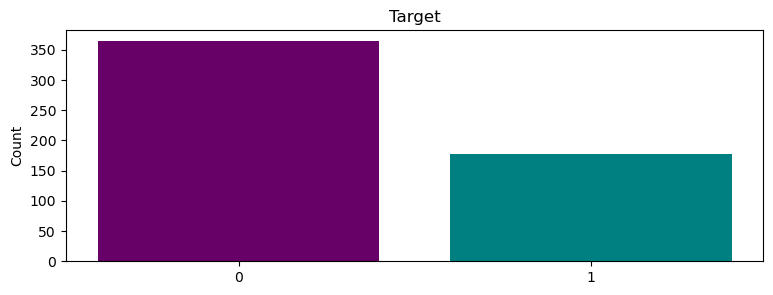

Target: 
 0    364
1    177
Name: Target, dtype: int64


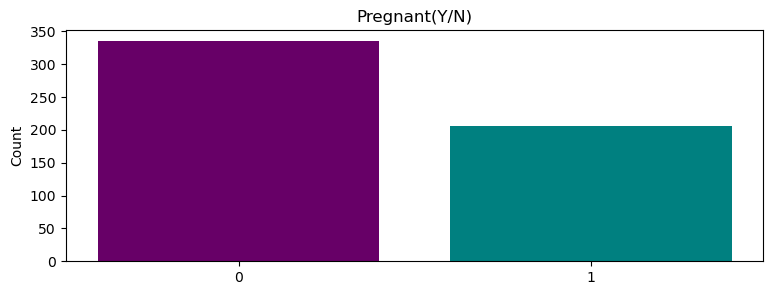

Pregnant(Y/N): 
 0    335
1    206
Name: Pregnant(Y/N), dtype: int64


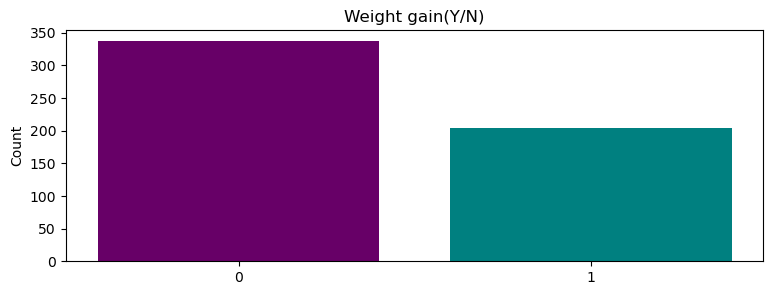

Weight gain(Y/N): 
 0    337
1    204
Name: Weight gain(Y/N), dtype: int64


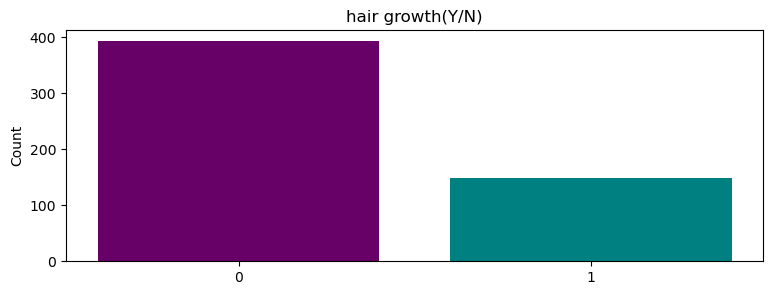

hair growth(Y/N): 
 0    393
1    148
Name: hair growth(Y/N), dtype: int64


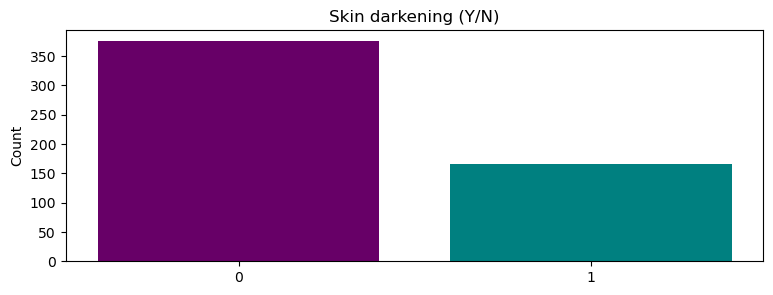

Skin darkening (Y/N): 
 0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


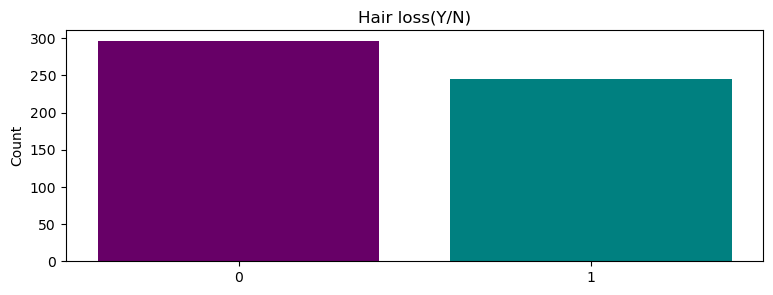

Hair loss(Y/N): 
 0    296
1    245
Name: Hair loss(Y/N), dtype: int64


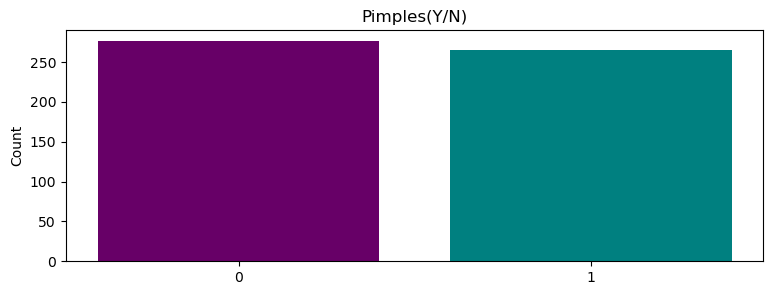

Pimples(Y/N): 
 0    276
1    265
Name: Pimples(Y/N), dtype: int64


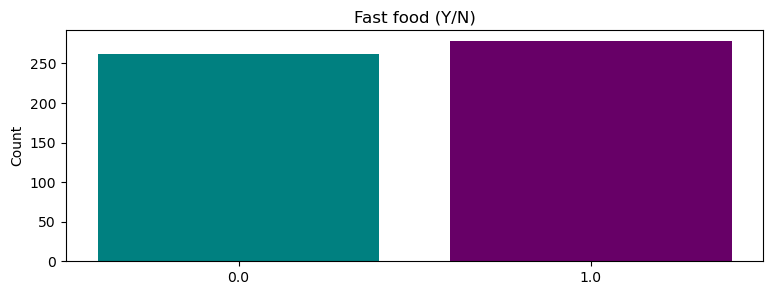

Fast food (Y/N): 
 1.0    278
0.0    262
Name: Fast food (Y/N), dtype: int64


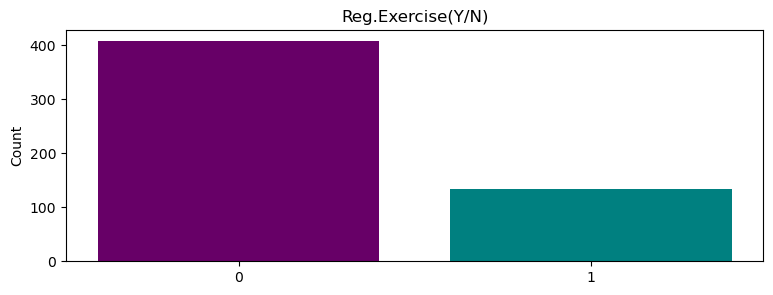

Reg.Exercise(Y/N): 
 0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


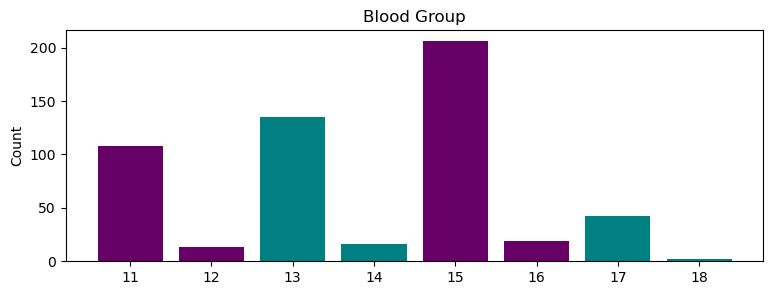

Blood Group: 
 15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [15]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", 
            "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

<a id = "6" ></a>
## <span style="color:purple;">Numerical Variable</span>

In [16]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[0])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

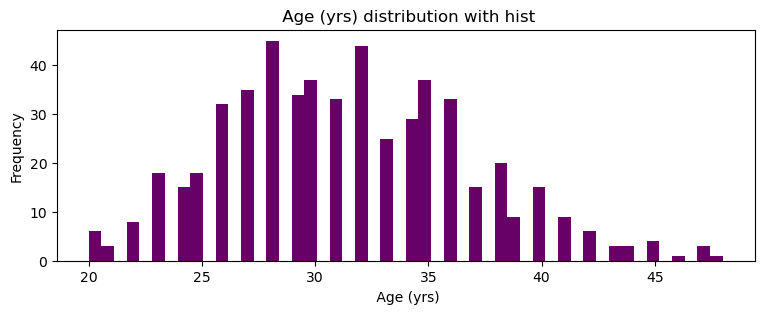

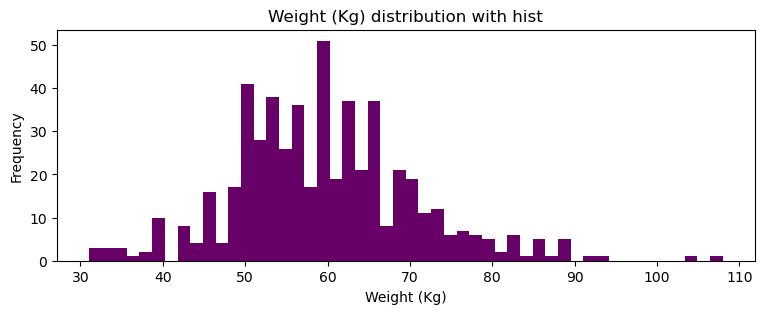

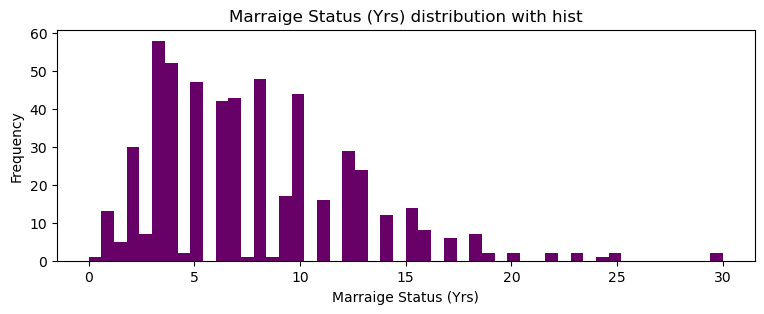

In [17]:
numericVar = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

<a id = "7" ></a>
# <span style="color:purple;">Missing Values</span>

In [18]:
data.columns[data.isnull().any()]

Index(['Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)',
       'Fast food (Y/N)'],
      dtype='object')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
    As you can see there are some missing values:Marraige Status (Yrs),II    beta-HCG(mIU/mL), AMH(ng/mL) and Fast food (Y/N). Let's deal with missing values. </p>
</div>

In [19]:
 #Filling missing values with the median value of the features.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)


In [20]:
data.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

<a id = "8" ></a>
# <span style="color:purple;">Data Analysis</span>

In [21]:
data.describe()

Target   Age (yrs)  Weight (Kg)  Height(Cm)          BMI  \
count  541.000000  541.000000   541.000000   541.000000  541.000000   
mean     0.327172   31.430684    59.637153   156.484835   24.311285   
std      0.469615    5.411006    11.028287     6.033545    4.056399   
min      0.000000   20.000000    31.000000   137.000000   12.417882   
25%      0.000000   28.000000    52.000000   152.000000   21.641274   
50%      0.000000   31.000000    59.000000   156.000000   24.238227   
75%      1.000000   35.000000    65.000000   160.000000   26.634958   
max      1.000000   48.000000   108.000000   180.000000   38.900000   

       Blood Group  Pulse rate(bpm)   RR (breaths/min)    Hb(g/dl)  \
count   541.000000        541.000000        541.000000  541.000000   
mean     13.802218         73.247689         19.243993   11.160037   
std       1.840812          4.430285          1.688629    0.866904   
min      11.000000         13.000000         16.000000    8.500000   
25%      13.000000         72.000000         18.000000   10.500000   
50%      14.000000         72.000000         18.000000   11.000000   
75%      15.000000         74.000000         20.000000   11.700000   
max      18.000000         82.000000         28.000000   14.800000   

       Cycle(R/I)  ...  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
count  541.000000  ...    541.000000       541.000000         541.000000   
mean     2.560074  ...      0.489834         0.515712           0.247689   
std      0.901950  ...      0.500359         0.500216           0.432070   
min      2.000000  ...      0.000000         0.000000           0.000000   
25%      2.000000  ...      0.000000         0.000000           0.000000   
50%      2.000000  ...      0.000000         1.000000           0.000000   
75%      4.000000  ...      1.000000         1.000000           0.000000   
max      5.000000  ...      1.000000         1.000000           1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           541.000000            541.000000        541.000000   
mean            114.661738             76.927911          6.129390   
std               7.384556              5.574112          4.229294   
min              12.000000              8.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        541.000000            541.000000            541.000000   
mean           6.641405             15.018115             15.451701   
std            4.436889              3.566839              3.318848   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  
count        541.000000  
mean           8.475915  
std            2.165381  
min            0.000000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 42 columns]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
Let's examine the correlation matrix of all features. </p>
</div>

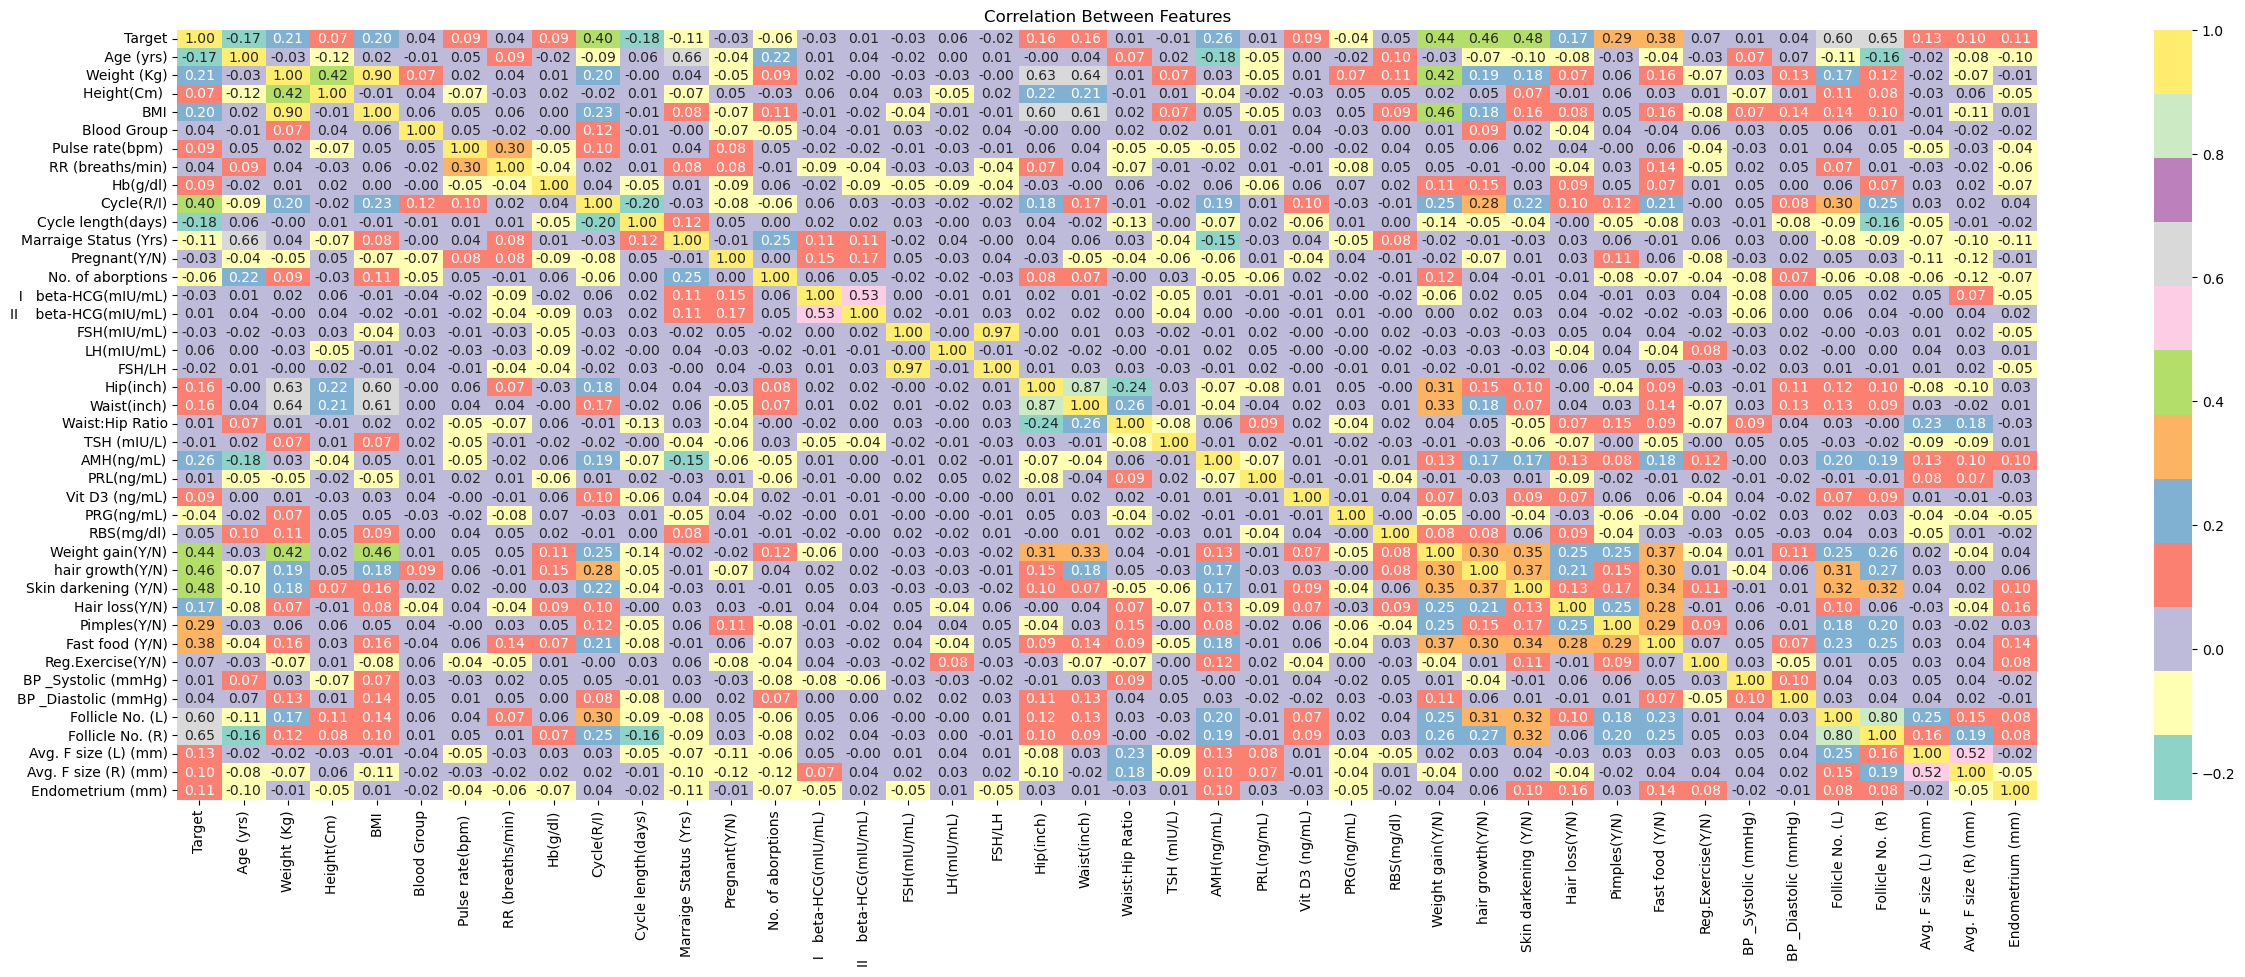

In [22]:
corr_matrix= data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
Let's look at the properties that have a relationship greater than 0.25 with the target.</p>
</div>

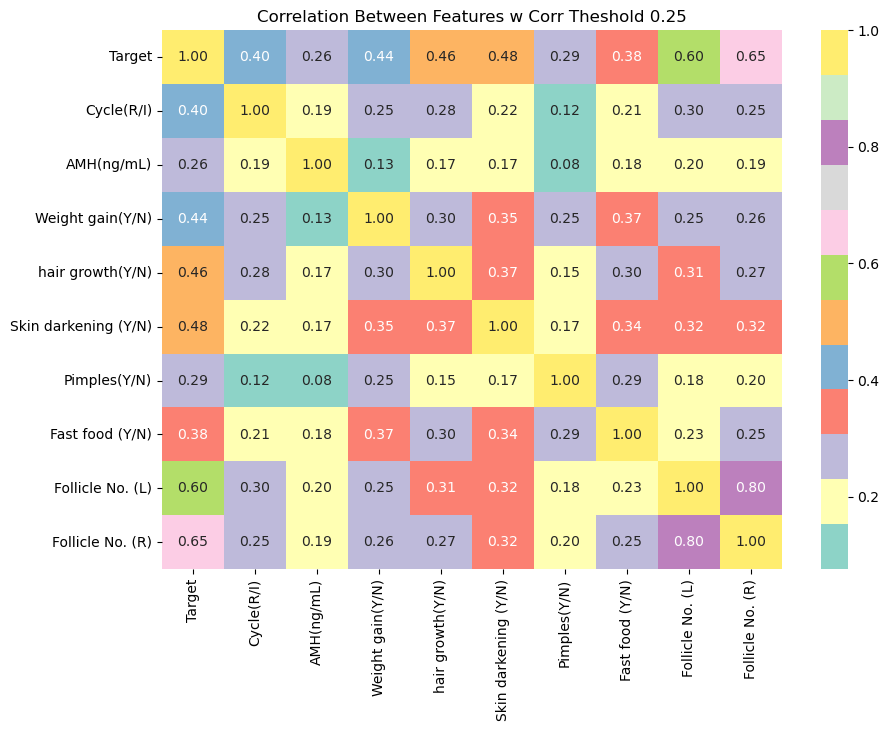

In [23]:
threshold = 0.25 
filtre = np.abs(corr_matrix["Target"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
plt.subplots(figsize=(10,7))
sns.heatmap(data[corr_features].corr(),cmap="Set3", annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.25")
plt.show()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

<a id = "9" ></a>
# <span style="color:purple;">Modeling</span>

<a id = "10" ></a>
## <span style="color:purple;">Train - Test Split</span>

In [25]:
X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

In [27]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


<a id = "11" ></a>
## <span style="color:purple;">Simple Logistic Regression</span>

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 86.77
Testing Accuracy: % 86.5


<a id = "12" ></a>
## <span style="color:purple;">Hyperparameter Tuning -- Grid Search -- Cross Validation</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<ul style="padding: 10px;color:white;">
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.
<li>Decision Tree</li>
<li>SVM</li>
<li>Random Forest</li>
<li>KNN</li>
<li>Logistic Regression</li></ul>
</div>

In [29]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [30]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
87.04
Fitting 10 folds for each of 28 candidates, totalling 280 fits
74.04
Fitting 10 folds for each of 48 candidates, totalling 480 fits
91.8
Fitting 10 folds for each of 14 candidates, totalling 140 fits
85.2
Fitting 10 folds for each of 40 candidates, totalling 400 fits
nan


In [31]:
best_estimators

[DecisionTreeClassifier(max_depth=5, min_samples_split=30, random_state=42),
 SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=9, n_estimators=300, random_state=42),
 LogisticRegression(C=0.01, random_state=42),
 KNeighborsClassifier(metric='euclidean', n_neighbors=1)]

In [32]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

<a id = "13" ></a>
## <span style="color:purple;">XGBRF and CatBoost Classsifier</span>

In [33]:
# xgbrf classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=random_state)
xgb_clf.fit(X_train,y_train)
acc_xgb_clf_train = round(xgb_clf.score(X_train, y_train)*100,2) 
acc_xgb_clf_test = round(xgb_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_xgb_clf_train)
print("Training Accuracy: % {}".format(acc_xgb_clf_train))
print("Testing Accuracy: % {}".format(acc_xgb_clf_test))

Training Accuracy: % 93.92
Testing Accuracy: % 85.89


In [34]:
#CatBoost Classifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
acc_cat_clf_train = round(cat_clf.score(X_train, y_train)*100,2) 
acc_cat_clf_test = round(cat_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_cat_clf_train)
print("Training Accuracy: % {}".format(acc_cat_clf_train))
print("Testing Accuracy: % {}".format(acc_cat_clf_test))

Learning rate set to 0.0068
0:	learn: 0.6859788	total: 147ms	remaining: 2m 26s
1:	learn: 0.6795964	total: 151ms	remaining: 1m 15s
2:	learn: 0.6730909	total: 154ms	remaining: 51.3s
3:	learn: 0.6670577	total: 158ms	remaining: 39.4s
4:	learn: 0.6604034	total: 162ms	remaining: 32.1s
5:	learn: 0.6551075	total: 165ms	remaining: 27.3s
6:	learn: 0.6497708	total: 169ms	remaining: 24s
7:	learn: 0.6452143	total: 172ms	remaining: 21.4s
8:	learn: 0.6393673	total: 175ms	remaining: 19.3s
9:	learn: 0.6337478	total: 179ms	remaining: 17.7s
10:	learn: 0.6272514	total: 182ms	remaining: 16.4s
11:	learn: 0.6219193	total: 186ms	remaining: 15.3s
12:	learn: 0.6162305	total: 189ms	remaining: 14.3s
13:	learn: 0.6107546	total: 192ms	remaining: 13.5s
14:	learn: 0.6048801	total: 196ms	remaining: 12.9s
15:	learn: 0.6009568	total: 200ms	remaining: 12.3s
16:	learn: 0.5963704	total: 203ms	remaining: 11.8s
17:	learn: 0.5927598	total: 206ms	remaining: 11.2s
18:	learn: 0.5874292	total: 209ms	remaining: 10.8s
19:	learn: 0.

192:	learn: 0.2202007	total: 744ms	remaining: 3.11s
193:	learn: 0.2198287	total: 747ms	remaining: 3.1s
194:	learn: 0.2190328	total: 750ms	remaining: 3.09s
195:	learn: 0.2181623	total: 753ms	remaining: 3.09s
196:	learn: 0.2174937	total: 756ms	remaining: 3.08s
197:	learn: 0.2168059	total: 758ms	remaining: 3.07s
198:	learn: 0.2160040	total: 761ms	remaining: 3.06s
199:	learn: 0.2155027	total: 764ms	remaining: 3.06s
200:	learn: 0.2148402	total: 767ms	remaining: 3.05s
201:	learn: 0.2140720	total: 770ms	remaining: 3.04s
202:	learn: 0.2129277	total: 773ms	remaining: 3.03s
203:	learn: 0.2123336	total: 775ms	remaining: 3.02s
204:	learn: 0.2116236	total: 778ms	remaining: 3.02s
205:	learn: 0.2111202	total: 781ms	remaining: 3.01s
206:	learn: 0.2103511	total: 784ms	remaining: 3s
207:	learn: 0.2094136	total: 787ms	remaining: 3s
208:	learn: 0.2087686	total: 790ms	remaining: 2.99s
209:	learn: 0.2077608	total: 793ms	remaining: 2.98s
210:	learn: 0.2070557	total: 795ms	remaining: 2.97s
211:	learn: 0.20652

394:	learn: 0.1277560	total: 1.36s	remaining: 2.08s
395:	learn: 0.1275962	total: 1.36s	remaining: 2.08s
396:	learn: 0.1274348	total: 1.36s	remaining: 2.07s
397:	learn: 0.1272432	total: 1.37s	remaining: 2.07s
398:	learn: 0.1271273	total: 1.37s	remaining: 2.06s
399:	learn: 0.1269329	total: 1.37s	remaining: 2.06s
400:	learn: 0.1265496	total: 1.38s	remaining: 2.06s
401:	learn: 0.1263152	total: 1.38s	remaining: 2.05s
402:	learn: 0.1260237	total: 1.38s	remaining: 2.05s
403:	learn: 0.1258045	total: 1.39s	remaining: 2.04s
404:	learn: 0.1255027	total: 1.39s	remaining: 2.04s
405:	learn: 0.1251923	total: 1.39s	remaining: 2.04s
406:	learn: 0.1249025	total: 1.4s	remaining: 2.03s
407:	learn: 0.1246255	total: 1.4s	remaining: 2.03s
408:	learn: 0.1244725	total: 1.4s	remaining: 2.03s
409:	learn: 0.1242577	total: 1.41s	remaining: 2.02s
410:	learn: 0.1239059	total: 1.41s	remaining: 2.02s
411:	learn: 0.1237970	total: 1.41s	remaining: 2.02s
412:	learn: 0.1236171	total: 1.42s	remaining: 2.01s
413:	learn: 0.1

571:	learn: 0.0929574	total: 1.92s	remaining: 1.44s
572:	learn: 0.0927420	total: 1.92s	remaining: 1.43s
573:	learn: 0.0926472	total: 1.93s	remaining: 1.43s
574:	learn: 0.0924541	total: 1.93s	remaining: 1.43s
575:	learn: 0.0923619	total: 1.93s	remaining: 1.42s
576:	learn: 0.0923015	total: 1.94s	remaining: 1.42s
577:	learn: 0.0921025	total: 1.94s	remaining: 1.42s
578:	learn: 0.0919224	total: 1.94s	remaining: 1.41s
579:	learn: 0.0917515	total: 1.95s	remaining: 1.41s
580:	learn: 0.0916739	total: 1.95s	remaining: 1.41s
581:	learn: 0.0915330	total: 1.95s	remaining: 1.4s
582:	learn: 0.0914937	total: 1.96s	remaining: 1.4s
583:	learn: 0.0912789	total: 1.96s	remaining: 1.4s
584:	learn: 0.0910535	total: 1.96s	remaining: 1.39s
585:	learn: 0.0909997	total: 1.96s	remaining: 1.39s
586:	learn: 0.0909185	total: 1.97s	remaining: 1.38s
587:	learn: 0.0908022	total: 1.97s	remaining: 1.38s
588:	learn: 0.0906662	total: 1.97s	remaining: 1.38s
589:	learn: 0.0905524	total: 1.98s	remaining: 1.37s
590:	learn: 0.0

763:	learn: 0.0697689	total: 2.51s	remaining: 775ms
764:	learn: 0.0695895	total: 2.51s	remaining: 772ms
765:	learn: 0.0695100	total: 2.52s	remaining: 768ms
766:	learn: 0.0693175	total: 2.52s	remaining: 765ms
767:	learn: 0.0691955	total: 2.52s	remaining: 762ms
768:	learn: 0.0690984	total: 2.52s	remaining: 758ms
769:	learn: 0.0689932	total: 2.53s	remaining: 755ms
770:	learn: 0.0687999	total: 2.53s	remaining: 752ms
771:	learn: 0.0686550	total: 2.53s	remaining: 748ms
772:	learn: 0.0684811	total: 2.54s	remaining: 745ms
773:	learn: 0.0683630	total: 2.54s	remaining: 742ms
774:	learn: 0.0683432	total: 2.54s	remaining: 738ms
775:	learn: 0.0681895	total: 2.55s	remaining: 735ms
776:	learn: 0.0681134	total: 2.55s	remaining: 732ms
777:	learn: 0.0679894	total: 2.55s	remaining: 728ms
778:	learn: 0.0678511	total: 2.55s	remaining: 725ms
779:	learn: 0.0677207	total: 2.56s	remaining: 721ms
780:	learn: 0.0677030	total: 2.56s	remaining: 718ms
781:	learn: 0.0675381	total: 2.56s	remaining: 714ms
782:	learn: 

954:	learn: 0.0521360	total: 3.09s	remaining: 146ms
955:	learn: 0.0520721	total: 3.09s	remaining: 142ms
956:	learn: 0.0520521	total: 3.1s	remaining: 139ms
957:	learn: 0.0520286	total: 3.1s	remaining: 136ms
958:	learn: 0.0518988	total: 3.1s	remaining: 133ms
959:	learn: 0.0518723	total: 3.11s	remaining: 129ms
960:	learn: 0.0518606	total: 3.11s	remaining: 126ms
961:	learn: 0.0518435	total: 3.12s	remaining: 123ms
962:	learn: 0.0518218	total: 3.12s	remaining: 120ms
963:	learn: 0.0517708	total: 3.12s	remaining: 117ms
964:	learn: 0.0516907	total: 3.12s	remaining: 113ms
965:	learn: 0.0515666	total: 3.13s	remaining: 110ms
966:	learn: 0.0514716	total: 3.13s	remaining: 107ms
967:	learn: 0.0513909	total: 3.13s	remaining: 104ms
968:	learn: 0.0513686	total: 3.14s	remaining: 100ms
969:	learn: 0.0512736	total: 3.14s	remaining: 97.1ms
970:	learn: 0.0511954	total: 3.14s	remaining: 93.9ms
971:	learn: 0.0511290	total: 3.15s	remaining: 90.6ms
972:	learn: 0.0510680	total: 3.15s	remaining: 87.4ms
973:	learn:

<a id = "14" ></a>
# <span style="color:purple;">Results</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#008080;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
Let's look at the model,accuracy score and confusion matrix</p>
</div>

In [35]:
model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','XGBRF','CatBoostClassifier']

In [36]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [37]:
model = [dt,svm,rf,lr,xgb_clf,cat_clf]
predictions = []

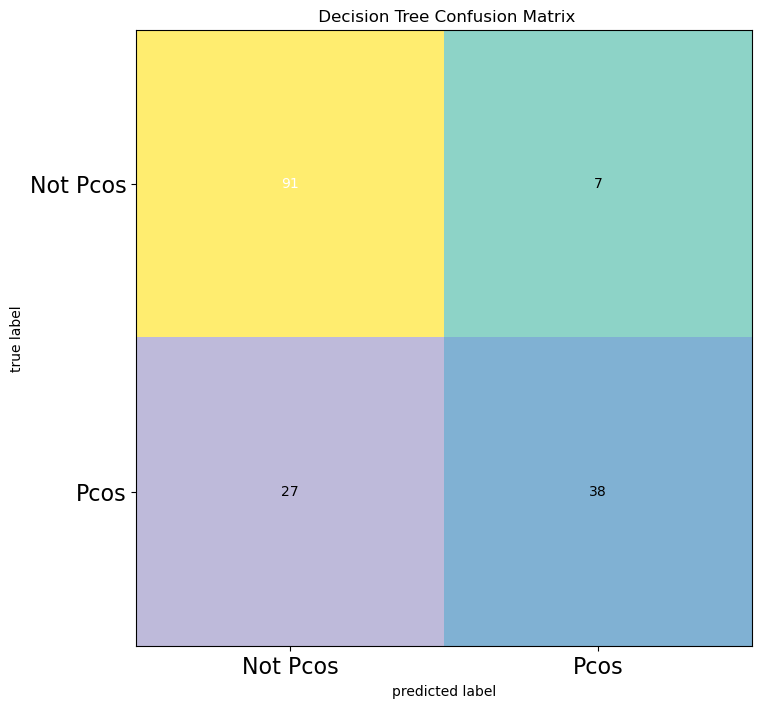

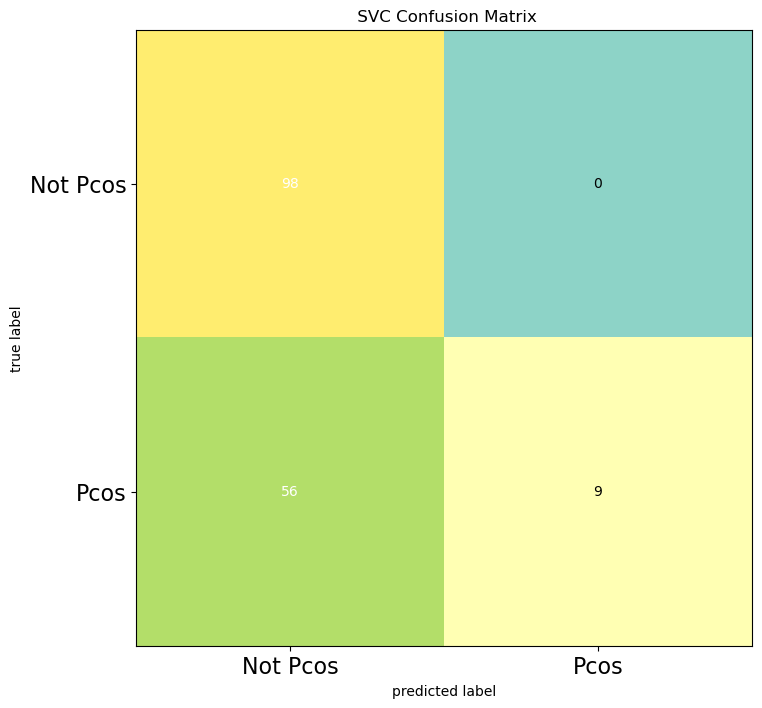

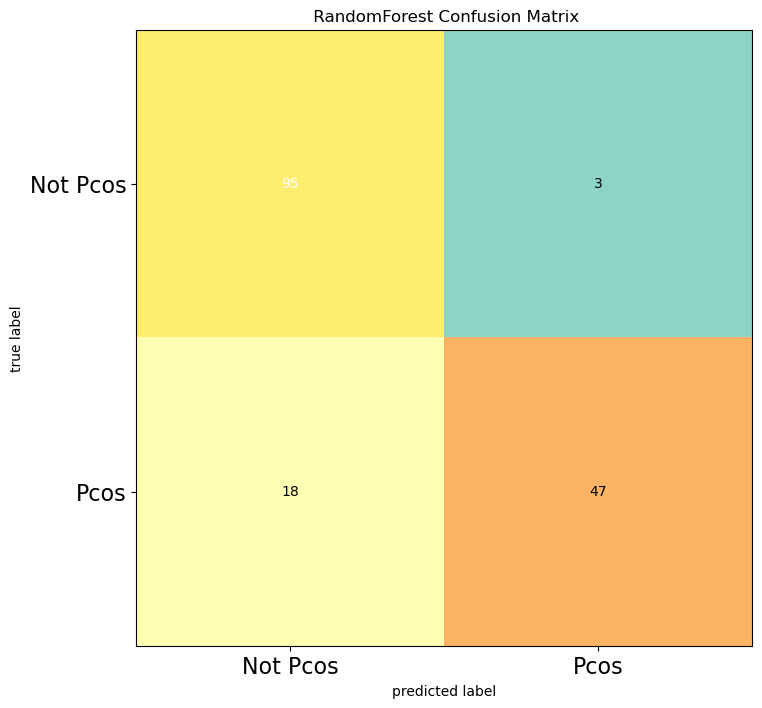

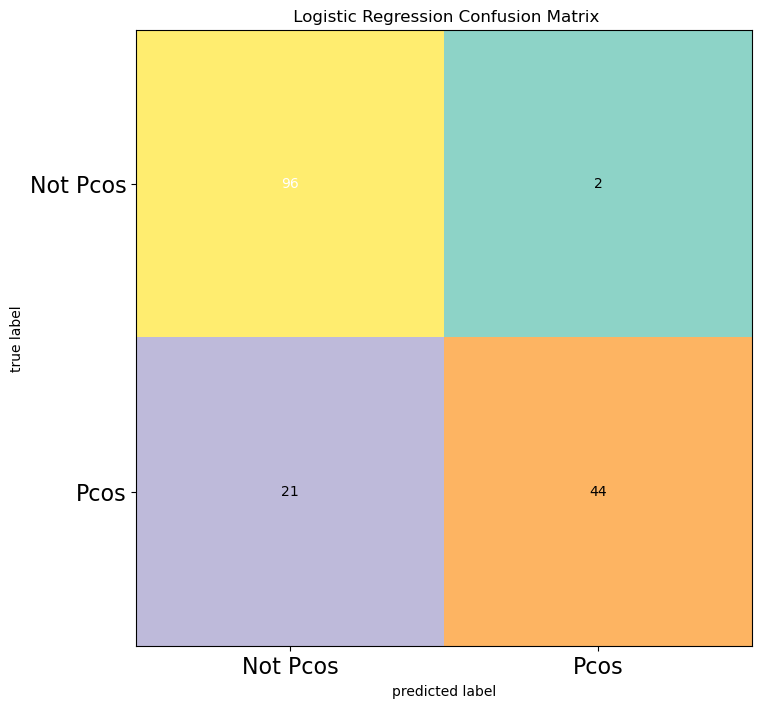

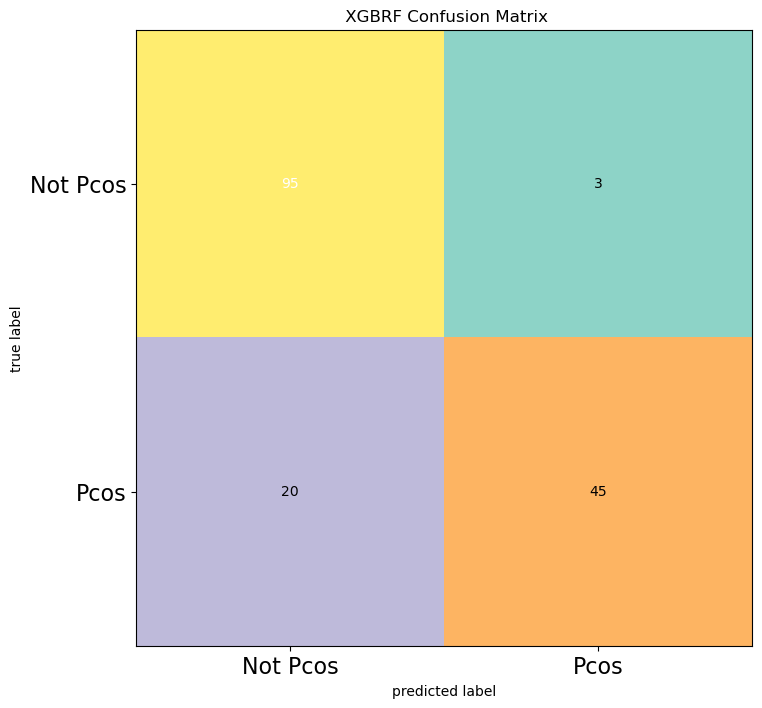

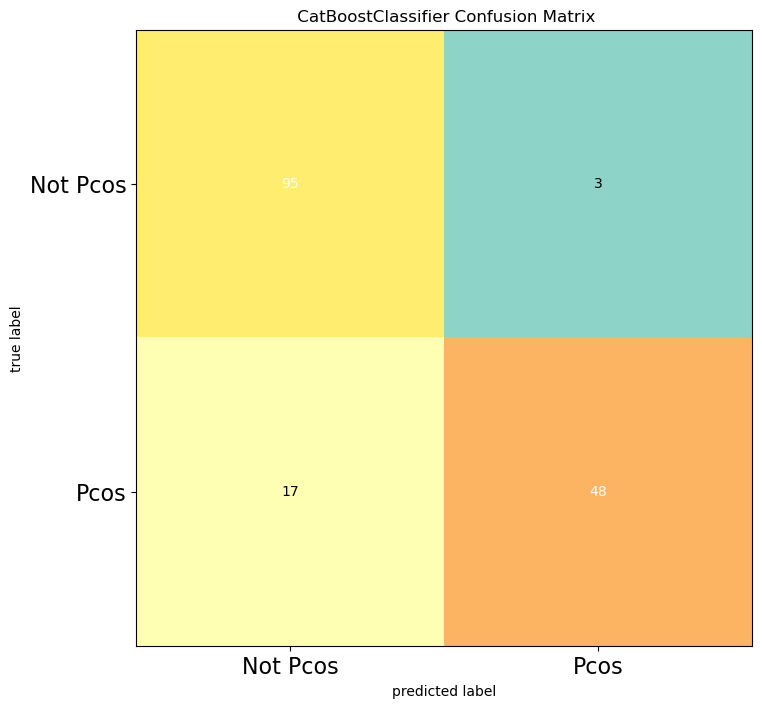

In [38]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(6):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Set3)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()

In [52]:
import pickle
data = {"model": cat_clf}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
X=df_woinf[["Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", 
            "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"," Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]]
Y=df_woinf["PCOS (Y/N)"]
cat_clf_loaded = data["model"]
X.head()
# y_pred = cat_clf_loaded.predict(X)
# y_pred

Pregnant(Y/N)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  \
0              0                 0                 0                     0   
1              1                 0                 0                     0   
2              1                 0                 0                     0   
3              0                 0                 0                     0   
4              1                 0                 0                     0   

   Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
0               0             0              1.0                  0   
1               0             0              0.0                  0   
2               1             1              1.0                  0   
3               0             0              0.0                  0   
4               1             0              0.0                  0   

   Blood Group   Age (yrs)  Weight (Kg)  Marraige Status (Yrs)  
0           15          28         44.6                    7.0  
1           15          36         65.0                   11.0  
2           11          33         68.8                   10.0  
3           13          37         65.0                    4.0  
4           11          25         52.0                    1.0